## Final Project Submission

Please fill out:
* Student name: Omega Markos
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Pablo
* Blog post URL:


In [52]:
# import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 999


description of the column

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Data cleaning


Tidying data for analysis: check for missing, duplicate & extraneous value.

In [7]:
kchouse = pd.read_csv ("kc_house_data.csv" )
kchouse.info() # To have a general idea of the data such as data types, name & number of columns & missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
kchouse.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the info above we learn that there are substential missing values in the 'waterfront' & 'yr_renovated' columns and few missing values in the "view' column

In [9]:
kchouse.duplicated().sum() # checking for duplicateds

0

There are no duplicate values. 

In [ ]:
# to check for extraneous values in the columns. 
# for col in kchouse.columns:
#     print (col,'\n', kchouse[col]. value_counts(normalize= True).head(), '\n\n')

On checking for extraneous data, It shows that 2.1% of the 'sqft_basement' is '?' and this needs to be fixed.

In [10]:
kchouse['sqft_basement'].replace('?', 'nan', inplace =True )

In [ ]:
kchouse.sqft_basement.value_counts(normalize=True)

In [6]:
kchouse['sqft_basement'].isna().sum()

0

since the mode & median of the missing values is zero, missing values are replaced randomly.



In [11]:
kchouse['yr_renovated'].fillna(lambda x:random.choice([ kchouse['yr_renovated'] != np.nan]['yr_renovated']), inplace =True)
kchouse['waterfront'].fillna(lambda x:random.choice( [chouse['waterfront'] != np.nan]['waterfront']), inplace =True)
kchouse['view'].fillna(lambda x:random.choice( [kchouse['view'] != np.nan]['view']), inplace =True)

In [ ]:
# kchouse.view.value_counts(normalize=True)

In [ ]:
#kcwaterfront_mode= kchouse['waterfront'].mode()
# kchouse.waterfront= kchouse.waterfront.fillna(value=kcwaterfront_mode)

In [ ]:
# kcview_mode= kchouse['view'].mode()
# kchouse.view= kchouse.view.fillna(value=kcview_mode)

In [ ]:
# kcyr_mode= kchouse['yr_renovated'].mode()
# kchouse.yr_renovated= kchouse.yr_renovated.fillna(value=kcyr_mode)

In [12]:
kchouse.isna().sum() # to check missing value after replacing

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Explanatory Data Analysis


In [13]:
kchouse.describe() # checking summary of statistics of the data.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The median sale price is 450k with the lowest 78k & highest 7.7 million. 

There is a big gap between the mean & the median price that is because the mean is affected by the few outliers in the data. 

More than 50% of the houses sold are 3 bedrooms and are graded 7. 

75% of the houses sold are not viewed. 

The oldest house was built in 1900 & the recent one is in 2015.

In [14]:
kchouse.groupby('bedrooms').median().price

bedrooms
1     299000.0
2     374000.0
3     413000.0
4     549997.5
5     620000.0
6     650000.0
7     728580.0
8     700000.0
9     817000.0
10    660000.0
11    520000.0
33    640000.0
Name: price, dtype: float64

In [53]:
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,<function <lambda> at 0x0000024B7EBE1510>,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,<function <lambda> at 0x0000024B03A817B8>,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
sale_bedrm= kchouse.groupby('bedrooms').agg({'floors': 'count','price': 'median'}).reset_index()

In [41]:
sale_bedrm.rename(columns = {'floors':'counts','price':'median price'},inplace=True)

In [42]:
sale_bedrm

,bedrooms,counts,median price
0,1,196,299000.0
1,2,2760,374000.0
2,3,9824,413000.0
3,4,6882,549997.5
4,5,1601,620000.0
5,6,272,650000.0
6,7,38,728580.0
7,8,13,700000.0
8,9,6,817000.0
9,10,3,660000.0


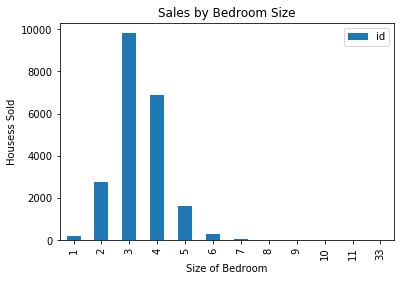

In [20]:
sale_bedrm.plot(kind='bar')
plt.xlabel('Size of Bedroom')
plt.ylabel('Housess Sold')
plt.title('Sales by Bedroom Size')
plt.legend()
plt.show()

3 bedroom house are the most popular homes followed by 4 bedrooms. and it is very intereseting to find 33 bedroom house with a median price of 640k. We need to look further into the data if this is a data entry error. 

In [22]:
kchouse.pivot(index ='price', columns='bedrooms')

ValueError: Index contains duplicate entries, cannot reshape

In [46]:
kchouse['date']= pd.to_datetime(kchouse['date'])
# kchouse.groupby(kchouse['date'].dt.year).count()[['id']]

In [51]:
kchouse.groupby(kchouse['date'].dt.year).agg({'id':'count'}).reset_index().rename(columns= {'id':'houses sold','date':'year'})

,year,houses sold
0,2014,14622
1,2015,6975


A total of 21597 sold in both years. The number of houses sold reducedy by more than 50% in 2015.

In [78]:
import os
os.getcwd()

'C:\\Users\\Omega\\Documents\\FLATIRON\\section01\\dsc-v2-mod1-final-project-online-ds-ft-061019'

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

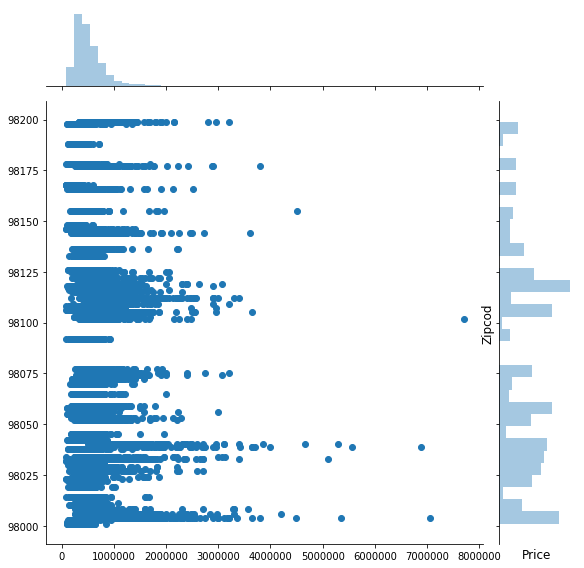

In [13]:
plt.figure(figsize=(8,8))
sns.jointplot(x= kchouse.price.values, y= kchouse.zipcode.values,size =8 )
plt.ylabel('Zipcod' , fontsize =12)
plt.xlabel('Price' , fontsize =12)
plt.show()

The neighborhoods between zipcodes 98100 & 98125 looks like an ideal location. A lot of houses were sold there & the highest sale price is there as well.

In [ ]:
# kchouse.yr_renovated.value_counts(normalize =True)

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

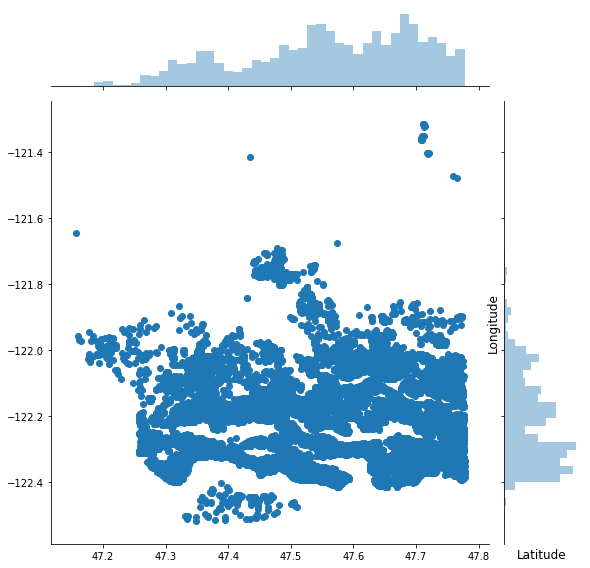

In [14]:
# kchouse.plot( kind='scatter', x= 'long', y= 'lat', alpha= 5.0, figsize=(10,10), c ='price' , cmap=plt.get_cmap("jet"),colorbar=True , sharex = False)
plt.figure(figsize=(8,8))
sns.jointplot(x= kchouse.lat.values, y= kchouse.long.values,size =8 )
plt.ylabel('Longitude' , fontsize =12)
plt.xlabel('Latitude' , fontsize =12)
plt.show()

 More houses are sold between latitude 47.5 to 47.8  and longitude of between -122 to-122.4

In [15]:
kchouse.groupby(kchouse.date.dt.month).count()[['id']]

,id
date,
1,978
2,1247
3,1875
4,2229
5,2414
6,2178
7,2211
8,1939
9,1771


January is the slowest month and a lot of houses are sold between April to July.

In [16]:
# kchouse.groupby('view').median().price

The expensive houses tend to get viewed more.

# Identifying Catagorical variables & transformation

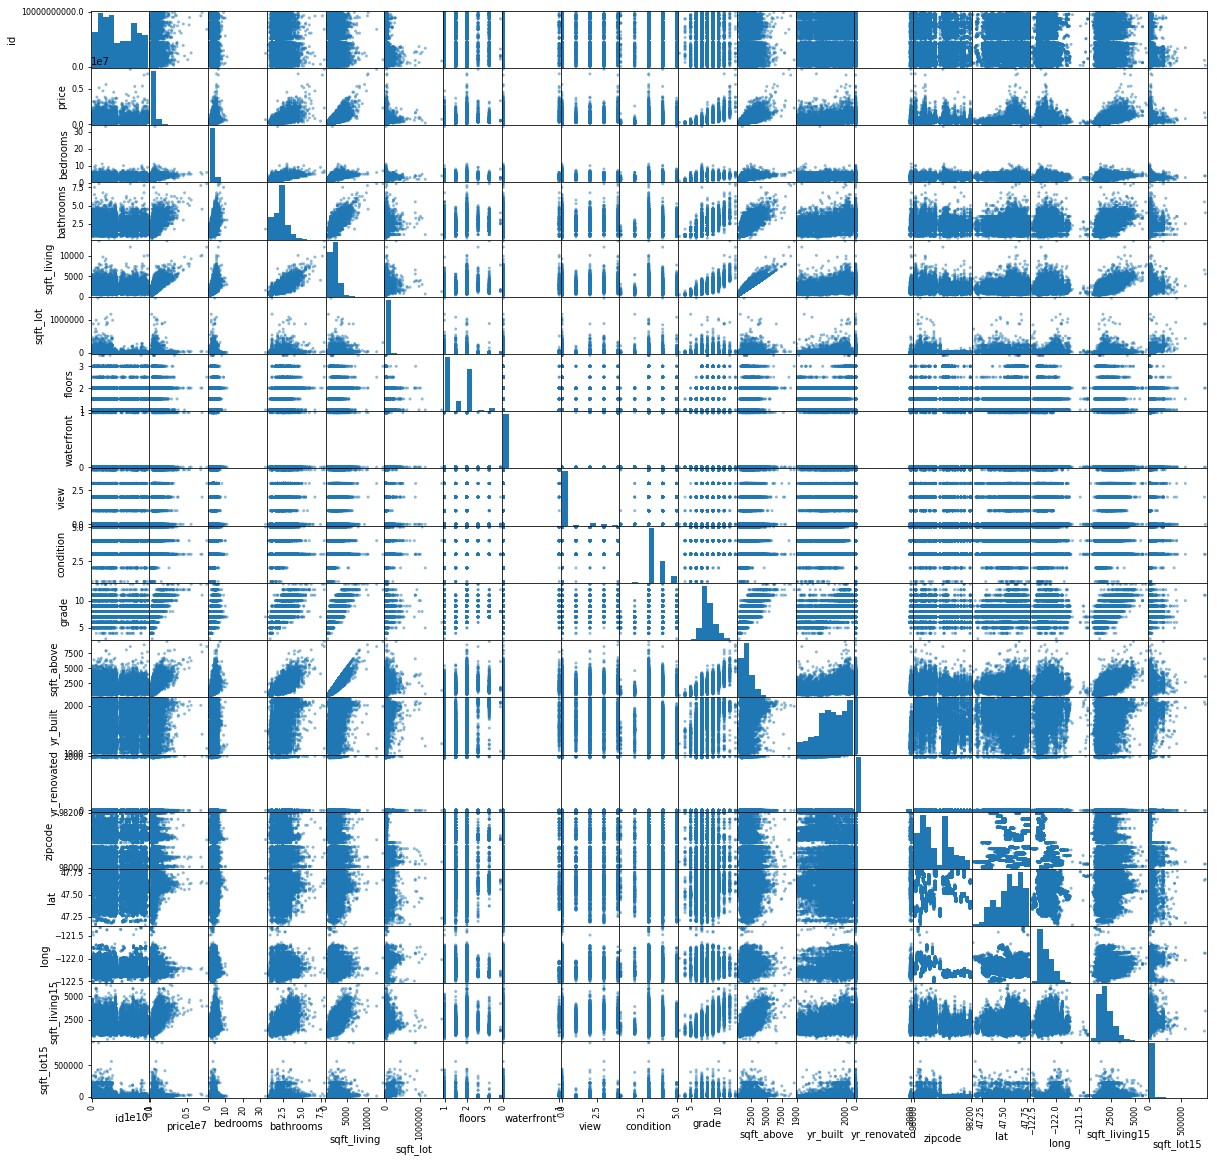

In [17]:
 pd.plotting.scatter_matrix(kchouse,figsize=[20,20]);

From the metrix above we learn that grade ,condition, floors ,water front  & view are catagorical variable.

In [55]:
kchouse['zipcode'].nunique()

70

In [56]:
bins= [98000,98033, 98065, 98118,98199]
bins_zipcode = pd.cut(kchouse['zipcode'], bins)
bins_zipcode=bins_zipcode.cat.as_unordered()
bins_zipcode.head()

0    (98118, 98199]
1    (98118, 98199]
2    (98000, 98033]
3    (98118, 98199]
4    (98065, 98118]
Name: zipcode, dtype: category
Categories (4, interval[int64]): [(98000, 98033], (98033, 98065], (98065, 98118], (98118, 98199]]

In [57]:
kchouse['zipcode']=bins_zipcode
kchouse['zipcode']=kchouse['zipcode'].cat.codes
zipcode_dummy= pd.get_dummies(bins_zipcode, prefix= 'zipcode')
kchouse= kchouse.drop(['zipcode'], axis =1)
kchouse=pd.concat([kchouse,zipcode_dummy],axis=1)

In [58]:
kchouse['view']=kchouse['view'].astype('category')
kchouse['view']=kchouse['view'].cat.codes 
view_dummy= pd.get_dummies(kchouse['view'], prefix= 'view')
kchouse= kchouse.drop(['view'], axis =1)
kchouse=pd.concat([kchouse,view_dummy],axis=1)

In [59]:
kchouse['waterfront']=kchouse['waterfront'].astype('category')
kchouse['waterfront']=kchouse['waterfront'].cat.codes 
wf_dummy= pd.get_dummies(kchouse['waterfront'], prefix= 'waterfront')
kchouse= kchouse.drop(['waterfront'], axis =1)
kchouse=pd.concat([kchouse,wf_dummy],axis=1)

In [60]:
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,"zipcode_(98000, 98033]","zipcode_(98033, 98065]","zipcode_(98065, 98118]","zipcode_(98118, 98199]",view_0,view_1,view_2,view_3,view_4,view_5,waterfront_0,waterfront_1,waterfront_2
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0,47.5112,-122.257,1340,5650,0,0,0,1,1,0,0,0,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991,47.7210,-122.319,1690,7639,0,0,0,1,1,0,0,0,0,0,0,1,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,<function <lambda> at 0x0000024B03A817B8>,47.7379,-122.233,2720,8062,1,0,0,0,1,0,0,0,0,0,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0,47.5208,-122.393,1360,5000,0,0,0,1,1,0,0,0,0,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0,47.6168,-122.045,1800,7503,0,0,1,0,1,0,0,0,0,0,0,1,0


C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


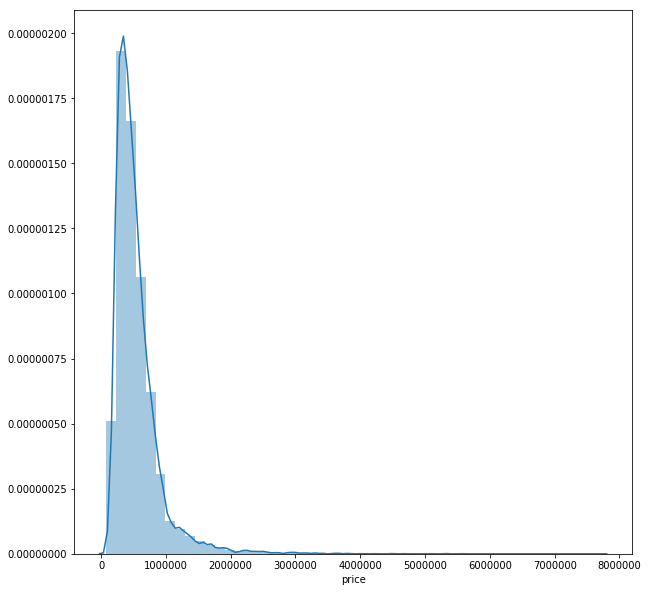

In [24]:
fig, ax = plt.subplots(figsize = (10, 10)) # to make the plot bigger
ax= sns.distplot(kchouse.price) # distribution plot to checking the distribution of the target variable 'price'.

Sale price is a little skewed to the left with few outliers.

#  Checking for correlation

In [25]:
abs(kchouse.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,"zipcode_(98118, 98199]",view_-1,view_0,view_1,view_2,view_3,view_4,waterfront_-1,waterfront_0,waterfront_1
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [1]:
fig, ax = plt.subplots(figsize = (18, 18)) # to make the heatmap bigger
sns.heatmap(kchouse.corr(),center=0, annot=True, annot_kws={"size":7});

NameError: name 'plt' is not defined

In [74]:
kchouse_corr = kchouse.corr()
high_corr = list(kchouse_corr[abs(kchouse.corr()) >= 0.3]['price'].dropna().reset_index()['index']) #to check the correlation between price & the other variables only

From the correlation table & the heat map, we can learn that there is a sttong positive correletion betwen the sale price and number of bathrooms. grade, square feet above the basement, square feet of living. Sqft_living being the highest.    

Except grade all the predictors are not normally dsistributed. Normal distribution of the feature variables is not mandatort but will help to improve our model so transformation will be ideal.

In [ ]:
# data_log = pd.DataFrame([])
# data_log['bathrooms'] = kchouse['bathrooms'] # the log transormation make the distribution worest 
# data_log['sqft_living'] = np.log(kchouse['sqft_living'])
# data_log['sqft_above'] = np.log(kchouse['sqft_above'])
# data_log['sqft_living15'] = np.log(kchouse['sqft_living15'])
# data_log['grade'] = kchouse['grade']
# data_log.hist(figsize  = [6, 6]);###



In [75]:
from statsmodels.formula.api import ols
outcome = 'price'
predictors = '+'.join(high_corr)
formula = outcome + '~' + predictors
model =ols(formula=formula, data=kchouse).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.014e+30
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:10:01   Log-Likelihood:             3.7811e+05
No. Observations:               21597   AIC:                        -7.562e+05
Df Residuals:                   21586   BIC:                        -7.561e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.63e-09   1.55e-08      0.105      0.916   -2.87e-08     3.2e-08
price             1.0000   1.88e-16   5.33e+15      0.000       1.000       1.000
bedrooms      -6.366e-11   5.66e-11     -1.126      0.260   -1.75e-10    4.72e-11
bathrooms       7.64e-11   8.53e-11      0.896      0.370   -9.07e-11    2.44e-10
sqft_living    4.619e-14   1.26e-13      0.367      0.713      -2e-13    2.93e-13
grade          1.455e-11   6.35e-11      0.229      0.819    -1.1e-10    1.39e-10
sqft_above    -7.816e-14   1.12e-13     -0.695      0.487   -2.98e-13    1.42e-13
lat           -1.673e-10   3.26e-10     -0.513      0.608   -8.07e-10    4.72e-10
sqft_living15  7.105e-15   9.89e-14      0.072      0.943   -1.87e-13    2.01e-13
view_0         5.275e-11   1.57e-10      0.336      0.737   -2.55e-10     3.6e-10
view_3                 0   3.77e-10          0      1.000   -7.39e-10    7.39e-10
==============================================================================
Omnibus:                    16866.730   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           699230.006
Skew:                          -3.409   Prob(JB):                         0.00
Kurtosis:                      30.029   Cond. No.                     2.47e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
predictors_int =sm.add_constant(data_log)
model = sm.OLS(kchouse['price'], predictors_int).fit()
model.summary()